In [2]:
import pandas as pd

In [3]:
chn=pd.read_csv("covid_chn.csv")
chn.head(10)

,Title,Link,Date,Content,Yearmonth
0,covid treatment molnupiravir approved for impo...,//www.chinadaily.com.cn/a/202212/30/WS63aee077...,2022-12-30 20:58:00,China's top drug regulator said on Friday that...,2022-12
1,china allocates medical resources to ensure pe...,//www.chinadaily.com.cn/a/202212/30/WS63ae92c7...,2022-12-30 15:26:00,BEIJING -- China is actively allocating medica...,2022-12
2,domestic covid-19 drug effective in trial,//www.chinadaily.com.cn/a/202212/30/WS63ae35c5...,2022-12-30 08:49:00,A domestic antiviral COVID-19 pill is as effec...,2022-12
3,steps taken to ensure covid preparedness,//www.chinadaily.com.cn/a/202212/30/WS63ae1757...,2022-12-30 06:39:00,China's recent shifts in COVID-19 control stra...,2022-12
4,china ensures production of fever reducing med...,//www.chinadaily.com.cn/a/202212/29/WS63ad91ac...,2022-12-29 21:09:00,The daily production volume of fever reduction...,2022-12
5,q&a on covid-19 reinfection,//www.chinadaily.com.cn/a/202212/29/WS63ad2cd3...,2022-12-29 13:59:00,The more virulent Delta strain of COVID-19 is ...,2022-12
6,beijing enhancing its hospital capacity,//www.chinadaily.com.cn/a/202212/29/WS63accedf...,2022-12-29 07:18:00,As COVID-19 cases continue to increase in the ...,2022-12
7,nation takes big leap on vaccinations,//www.chinadaily.com.cn/a/202212/29/WS63acc644...,2022-12-29 06:41:00,"Targeted inoculation programs, medical innovat...",2022-12
8,"hong kong to lift social distancing measures, ...",//www.chinadaily.com.cn/a/202212/28/WS63ac620e...,2022-12-28 23:34:00,"HONG KONG -- John Lee, chief executive of Chin...",2022-12
9,china releases details of covid-19 management ...,//www.chinadaily.com.cn/a/202212/28/WS63abcdff...,2022-12-28 13:02:00,BEIJING -- China has announced that it will be...,2022-12


In [4]:
chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      3511 non-null   object
 1   Link       3511 non-null   object
 2   Date       3511 non-null   object
 3   Content    3510 non-null   object
 4   Yearmonth  3511 non-null   object
dtypes: object(5)
memory usage: 137.3+ KB


In [3]:
pd.set_option('display.max_colwidth', None)
chn.loc[0]

Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    covid treatment molnupiravir approved for import in china
Link 

In [5]:
import re 
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package punkt to /Users/hy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.stem import WordNetLemmatizer
import spacy
from spacy.cli import download

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/hy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nlp=spacy.load("en_core_web_sm")


In [9]:
def preprocess_content(content):
    if isinstance(content, str):
         content=content.lower()
    # Remove content after "Copyright"
         content=re.split(r'\bcopyright\b', content)[0]
         content=re.sub('<.*>', '', content)
         content=re.sub('\((.*?\))', '', content)
         content=re.sub('\[.*?\]', '', content)
         content=re.sub('[%s]' % re.escape(string.punctuation), ' ', content)
         content=re.sub('\w*\d\w*', '', content)
         content=re.sub(r'[\n\r\t]', '', content)
    # tokenization
         tokens=nltk.word_tokenize(content)
    # remove the stop words
         stop_words=set(stopwords.words('english'))
         tokens=[word for word in tokens if word.lower() not in stop_words]
    # lemmitization 
         doc=nlp(' '.join(tokens))
         tokens=[token.lemma_ for token in doc]
         return tokens
    else:
        return [] 


In [10]:
chn['Tokens']=chn['Content'].apply(preprocess_content)
chn

,Title,Link,Date,Content,Yearmonth,Tokens
0,covid treatment molnupiravir approved for impo...,//www.chinadaily.com.cn/a/202212/30/WS63aee077...,2022-12-30 20:58:00,China's top drug regulator said on Friday that...,2022-12,"[china, top, drug, regulator, say, friday, gra..."
1,china allocates medical resources to ensure pe...,//www.chinadaily.com.cn/a/202212/30/WS63ae92c7...,2022-12-30 15:26:00,BEIJING -- China is actively allocating medica...,2022-12,"[beijing, china, actively, allocate, medical, ..."
2,domestic covid-19 drug effective in trial,//www.chinadaily.com.cn/a/202212/30/WS63ae35c5...,2022-12-30 08:49:00,A domestic antiviral COVID-19 pill is as effec...,2022-12,"[domestic, antiviral, covid, pill, effective, ..."
3,steps taken to ensure covid preparedness,//www.chinadaily.com.cn/a/202212/30/WS63ae1757...,2022-12-30 06:39:00,China's recent shifts in COVID-19 control stra...,2022-12,"[china, recent, shift, covid, control, strateg..."
4,china ensures production of fever reducing med...,//www.chinadaily.com.cn/a/202212/29/WS63ad91ac...,2022-12-29 21:09:00,The daily production volume of fever reduction...,2022-12,"[daily, production, volume, fever, reduction, ..."
...,...,...,...,...,...,...
3506,wuhan wet market closes amid pneumonia outbreak,//www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...,2020-01-01 17:45:00,A Central China wet market known for seafood w...,2020-01,"[central, china, wet, market, know, seafood, c..."
3507,27 quarantined in wuhan due to viral pneumonia,//www.chinadaily.com.cn/a/202001/01/WS5e0bdf82...,2020-01-01 07:53:00,Twenty-seven people infected by viral pneumoni...,2020-01,"[twenty, seven, people, infect, viral, pneumon..."
3508,viral pneumonia cases reported in central china,//www.chinadaily.com.cn/a/201912/31/WS5e0b1132...,2019-12-31 17:13:00,"WUHAN - The 27 pneumonia cases in Wuhan, capit...",2019-12,"[wuhan, pneumonia, case, wuhan, capital, centr..."
3509,china's 1st homegrown hpv vaccine approved,//www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...,2019-12-31 16:52:00,China's drug regulator has approved the countr...,2019-12,"[china, drug, regulator, approve, country, fir..."


In [13]:
bbc=pd.read_csv("covid_bbc.csv")
bbc.info

<bound method DataFrame.info of                                                   Title  \
0              eu could fail over virus, warns italy pm   
1     queues in china for experimental covid-19 vaccine   
2     stay at home in variant test areas, hancock urges   
3     uk 'made serious mistake' over virus border po...   
4     india's covid doctors demand action after attacks   
...                                                 ...   
2275    us concerned by china military jets near taiwan   
2276     taiwan technology giants to buy 10m covid jabs   
2277     us angers china with high-profile taiwan visit   
2278    china vows consequences if pelosi visits taiwan   
2279   nicaragua gets china vaccines after taiwan split   

                                                   Link  \
0        https://www.bbc.com/news/world-europe-52224838   
1     https://www.bbc.com/news/world-asia-china-5458...   
2                  https://www.bbc.com/news/uk-55906365   
3         https://www.b

In [14]:
bbc['Tokens']=bbc['Content'].apply(preprocess_content)
bbc

,Title,Link,Date,Summary,Content,Yearmonth,Tokens
0,"eu could fail over virus, warns italy pm",https://www.bbc.com/news/world-europe-52224838,2020-04-09 04:04:58+00:00,Giuseppe Conte tells the BBC EU leaders need t...,Italy's prime minister has told the BBC that t...,2020-04,"[italy, prime, minister, tell, bbc, european, ..."
1,queues in china for experimental covid-19 vaccine,https://www.bbc.com/news/world-asia-china-5458...,2020-10-17 08:34:35+00:00,The vaccine is available to the public in the ...,A city in eastern China has started offering a...,2020-10,"[city, eastern, china, start, offer, coronavir..."
2,"stay at home in variant test areas, hancock urges",https://www.bbc.com/news/uk-55906365,2021-02-02 19:47:13+00:00,People in areas where the South African varian...,"It is ""critical"" that people in areas singled ...",2021-02,"[critical, people, area, single, enhanced, tes..."
3,uk 'made serious mistake' over virus border po...,https://www.bbc.com/news/uk-politics-53654644,2020-08-05 07:12:05+00:00,A Commons committee says ministers were slow t...,The spread of coronavirus in the UK could have...,2020-08,"[spread, coronavirus, uk, could, slow, early, ..."
4,india's covid doctors demand action after attacks,https://www.bbc.com/news/world-asia-india-5764...,2021-07-05 23:07:12+00:00,Doctors are seeking a stringent law to protect...,Dr Seuj Kumar Senapati vividly remembers the a...,2021-07,"[dr, seuj, kumar, senapati, vividly, remember,..."
...,...,...,...,...,...,...,...
2275,us concerned by china military jets near taiwan,https://www.bbc.com/news/world-asia-58780258,2021-10-03 16:20:25+00:00,China has flown some 93 military planes over T...,"The US has said it is ""very concerned"" by Chin...",2021-10,"[we, say, concerned, china, provocative, actio..."
2276,taiwan technology giants to buy 10m covid jabs,https://www.bbc.com/news/business-57801031,2021-07-12 05:48:03+00:00,The government has come under intense pressure...,Two of the world's biggest technology manufact...,2021-07,"[two, world, big, technology, manufacturer, bu..."
2277,us angers china with high-profile taiwan visit,https://www.bbc.com/news/world-asia-53719333,2020-08-10 06:03:48+00:00,Health Secretary Alex Azar is the highest-rank...,A US cabinet member met Taiwan’s president on ...,2020-08,"[we, cabinet, member, meet, taiwan, ', preside..."
2278,china vows consequences if pelosi visits taiwan,https://www.bbc.com/news/world-us-canada-62310576,2022-07-27 05:20:45+00:00,The Chinese military says it will not sit idly...,US House of Representatives Speaker Nancy Pelo...,2022-07,"[us, house, representative, speaker, nancy, pe..."


In [11]:
import re
import string
import gensim
from gensim import corpora

In [12]:
chn['title_tokens']=chn['Title'].apply(preprocess_content)


In [13]:
chn_dict=corpora.Dictionary(chn['title_tokens'])
chn_corpus=[chn_dict.doc2bow(text) for text in chn['title_tokens']]

In [14]:
import matplotlib.pyplot as plt

In [15]:
from gensim.models import CoherenceModel

In [117]:
# Function to evaluate for different number of topics
def evaluations(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values=[]
    perplexity_values=[]
    model_list=[]
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                id2word=dictionary, 
                                                num_topics=num_topics, 
                                                random_state=100,
                                                passes=10,
                                                alpha=0.1, 
                                                eta=0.1)
        model_list.append(model)
        coherencemodel=CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(chn_corpus))
    return model_list, coherence_values, perplexity_values

# Running the function
model_list, coherence_values,perplexity_values=evaluations(dictionary=chn_dict, corpus=chn_corpus, texts=chn['title_tokens'], start=2, limit=14, step=1)


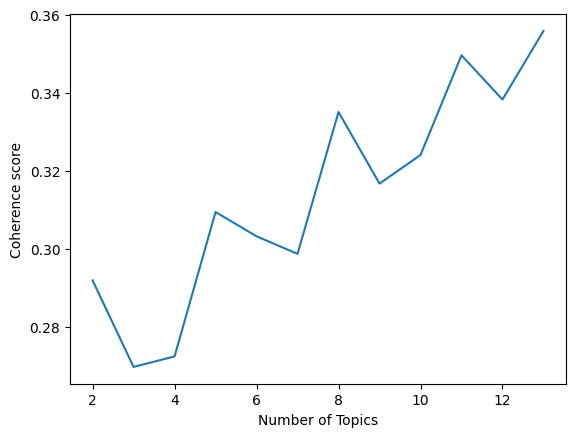

In [118]:
x = range(2, 14, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.show()

In [119]:
coherence_values

[0.2918578078449884,
 0.2696598271423673,
 0.27234847256518985,
 0.3093924678747958,
 0.3031564550240868,
 0.2986516838645514,
 0.33502933613358293,
 0.3166693292447423,
 0.32400579864317364,
 0.34956880874105345,
 0.33822476395685325,
 0.3558211851039745]

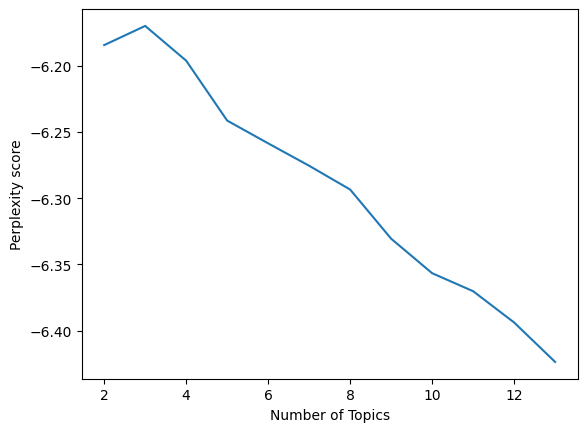

In [121]:
x = range(2, 14, 1)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity score")
plt.show()


In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from sklearn.model_selection import GridSearchCV

In [85]:
class LdaTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_topics=10, alpha='symmetric', eta='symmetric', passes=10, random_state=100):
        self.num_topics = num_topics
        self.alpha = alpha
        self.eta = eta
        self.passes = passes
        self.random_state = random_state
        self.model = None
        
    def fit(self, X, y=None):
        self.model = LdaModel(corpus=X, num_topics=self.num_topics, id2word=chn_dict,
                              passes=self.passes, alpha=self.alpha, eta=self.eta,
                              random_state=self.random_state)
        return self
    
    def transform(self, X):
        return self.model[X]
    
    def score(self, X, y=None):
        return -self.model.log_perplexity(X) 

In [87]:
params = {
    'num_topics': [7, 8, 10],
    'alpha': [0.1, 0.2, 0.5],
    'eta': [0.1, 0.3, 0.5]
}

# Initialize the LDA model wrapper
lda_estimator = LdaTransformer(passes=10, random_state=100)

# Set up GridSearchCV
gridsearch = GridSearchCV(estimator=lda_estimator, param_grid=params, cv=5)

# Perform grid search on the corpus
gridsearch.fit(chn_corpus)

GridSearchCV(cv=5, estimator=LdaTransformer(),
             param_grid={'alpha': [0.1, 0.2, 0.5], 'eta': [0.1, 0.3, 0.5],
                         'num_topics': [7, 8, 10]})

In [88]:
# Get the best LDA model
best_lda_model = gridsearch.best_estimator_.model

# Get the best parameters
best_params = gridsearch.best_params_

# Print the results
print("Best Model's Parameters:", best_params)
print("Best Model's Log Perplexity:", -gridsearch.best_score_)

Best Model's Parameters: {'alpha': 0.1, 'eta': 0.1, 'num_topics': 10}
Best Model's Log Perplexity: -9.016945403869247


In [17]:
# Perform best score of LDA topic modeling
chn_tm_lda=gensim.models.ldamodel.LdaModel(chn_corpus, 
                                           num_topics=10, 
                                           id2word=chn_dict,
                                           random_state=100,
                                           passes=10,
                                           alpha=0.1, 
                                           eta=0.1)

# Display the topics
topics=chn_tm_lda.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.101*"covid" + 0.080*"vaccine" + 0.043*"china" + 0.036*"dose" + 0.029*"administer" + 0.027*"measure" + 0.017*"new" + 0.016*"across" + 0.016*"guangzhou" + 0.015*"variant" + 0.014*"effective" + 0.014*"chinese" + 0.011*"response" + 0.011*"million" + 0.011*"show"')
(1, '0.060*"covid" + 0.042*"patient" + 0.039*"case" + 0.037*"beijing" + 0.027*"hospital" + 0.024*"virus" + 0.023*"china" + 0.022*"test" + 0.018*"rise" + 0.016*"new" + 0.015*"continue" + 0.014*"risk" + 0.014*"outbreak" + 0.012*"first" + 0.011*"heilongjiang"')
(2, '0.035*"medical" + 0.035*"novel" + 0.035*"coronavirus" + 0.034*"wuhan" + 0.024*"china" + 0.023*"virus" + 0.017*"team" + 0.016*"hubei" + 0.015*"disease" + 0.013*"boost" + 0.013*"pneumonia" + 0.012*"treatment" + 0.010*"coronaviru" + 0.010*"infection" + 0.010*"work"')
(3, '0.064*"coronavirus" + 0.044*"covid" + 0.023*"fight" + 0.021*"shanghai" + 0.020*"help" + 0.017*"outbreak" + 0.014*"virus" + 0.014*"china" + 0.013*"beijing" + 0.013*"battle" + 0.011*"find" + 0.011*"me

In [18]:
def topic_with_prob(lda_model, corpus):
    topics=[]
    prob=[]
    
    for doc in corpus:
        topic_prob=lda_model.get_document_topics(doc)
        # Find the topic with the highest probability
        dominant_topic, dominant_prob = max(topic_prob, key=lambda x: x[1])
        topics.append(dominant_topic)
        prob.append(dominant_prob)
    
    return topics, prob

# Apply the function to get topics and probabilities
chn['Topic'], chn['Topic_Prob'] = topic_with_prob(chn_tm_lda, chn_corpus)

# Display the dataframe to see the added columns
chn


,Title,Link,Date,Content,Yearmonth,Tokens,title_tokens,Topic,Topic_Prob
0,covid treatment molnupiravir approved for impo...,//www.chinadaily.com.cn/a/202212/30/WS63aee077...,2022-12-30 20:58:00,China's top drug regulator said on Friday that...,2022-12,"[china, top, drug, regulator, say, friday, gra...","[covid, treatment, molnupiravir, approve, impo...",4,0.586001
1,china allocates medical resources to ensure pe...,//www.chinadaily.com.cn/a/202212/30/WS63ae92c7...,2022-12-30 15:26:00,BEIJING -- China is actively allocating medica...,2022-12,"[beijing, china, actively, allocate, medical, ...","[china, allocate, medical, resource, ensure, p...",2,0.618605
2,domestic covid-19 drug effective in trial,//www.chinadaily.com.cn/a/202212/30/WS63ae35c5...,2022-12-30 08:49:00,A domestic antiviral COVID-19 pill is as effec...,2022-12,"[domestic, antiviral, covid, pill, effective, ...","[domestic, covid, drug, effective, trial]",0,0.474135
3,steps taken to ensure covid preparedness,//www.chinadaily.com.cn/a/202212/30/WS63ae1757...,2022-12-30 06:39:00,China's recent shifts in COVID-19 control stra...,2022-12,"[china, recent, shift, covid, control, strateg...","[step, take, ensure, covid, preparedness]",0,0.649031
4,china ensures production of fever reducing med...,//www.chinadaily.com.cn/a/202212/29/WS63ad91ac...,2022-12-29 21:09:00,The daily production volume of fever reduction...,2022-12,"[daily, production, volume, fever, reduction, ...","[china, ensure, production, fever, reduce, med...",2,0.871414
...,...,...,...,...,...,...,...,...,...
3506,wuhan wet market closes amid pneumonia outbreak,//www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...,2020-01-01 17:45:00,A Central China wet market known for seafood w...,2020-01,"[central, china, wet, market, know, seafood, c...","[wuhan, wet, market, close, amid, pneumonia, o...",9,0.749660
3507,27 quarantined in wuhan due to viral pneumonia,//www.chinadaily.com.cn/a/202001/01/WS5e0bdf82...,2020-01-01 07:53:00,Twenty-seven people infected by viral pneumoni...,2020-01,"[twenty, seven, people, infect, viral, pneumon...","[quarantine, wuhan, due, viral, pneumonia]",2,0.671509
3508,viral pneumonia cases reported in central china,//www.chinadaily.com.cn/a/201912/31/WS5e0b1132...,2019-12-31 17:13:00,"WUHAN - The 27 pneumonia cases in Wuhan, capit...",2019-12,"[wuhan, pneumonia, case, wuhan, capital, centr...","[viral, pneumonia, case, report, central, china]",0,0.308715
3509,china's 1st homegrown hpv vaccine approved,//www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...,2019-12-31 16:52:00,China's drug regulator has approved the countr...,2019-12,"[china, drug, regulator, approve, country, fir...","[china, homegrown, hpv, vaccine, approve]",6,0.672118


In [23]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# 创建可视化
vis_data=gensimvis.prepare(chn_tm_lda, chn_corpus, chn_dict)
pyLDAvis.display(vis_data)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

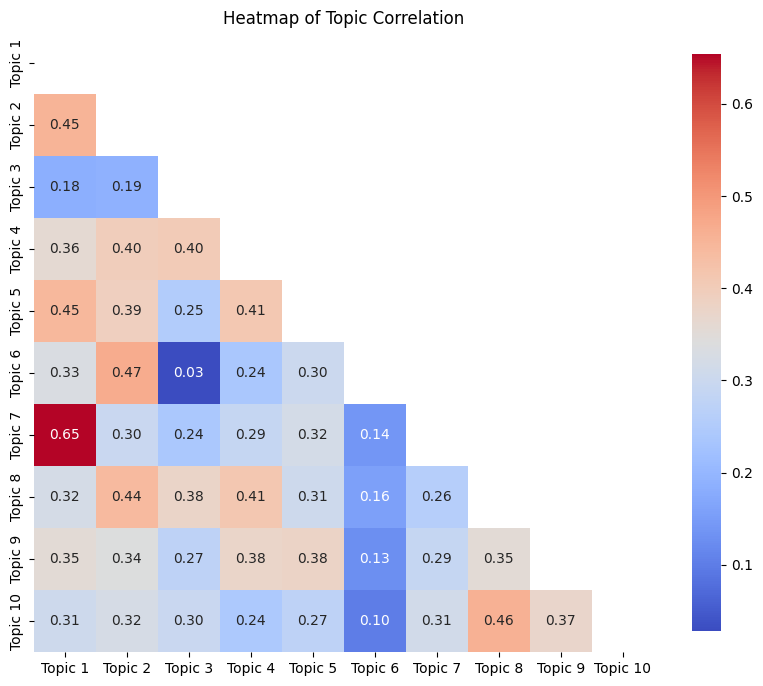

In [20]:
topic_vectors = []
for topic in chn_tm_lda.show_topics(formatted=False, num_words=len(chn_dict.keys())):
    vector=np.zeros(len(chn_dict))  # Initialize vector of zeros
    for word, weight in topic[1]:  # Assuming topic[1] is a list of (word, weight) tuples
        word_id = chn_dict.token2id[word]
        vector[word_id] = weight
    topic_vectors.append(vector)

# Convert to numpy array and the similarity_matrix
topic_vectors=np.array(topic_vectors)
similarity_matrix=cosine_similarity(topic_vectors)
mask=np.triu(np.ones_like(similarity_matrix,dtype=bool))
num_topics=similarity_matrix.shape[0]
labels=[f'Topic {i+1}' for i in range(num_topics)]

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',square=True, cbar_kws={"shrink": 0.75},xticklabels=labels, yticklabels=labels)
plt.title("Heatmap of Topic Correlation")
plt.show()

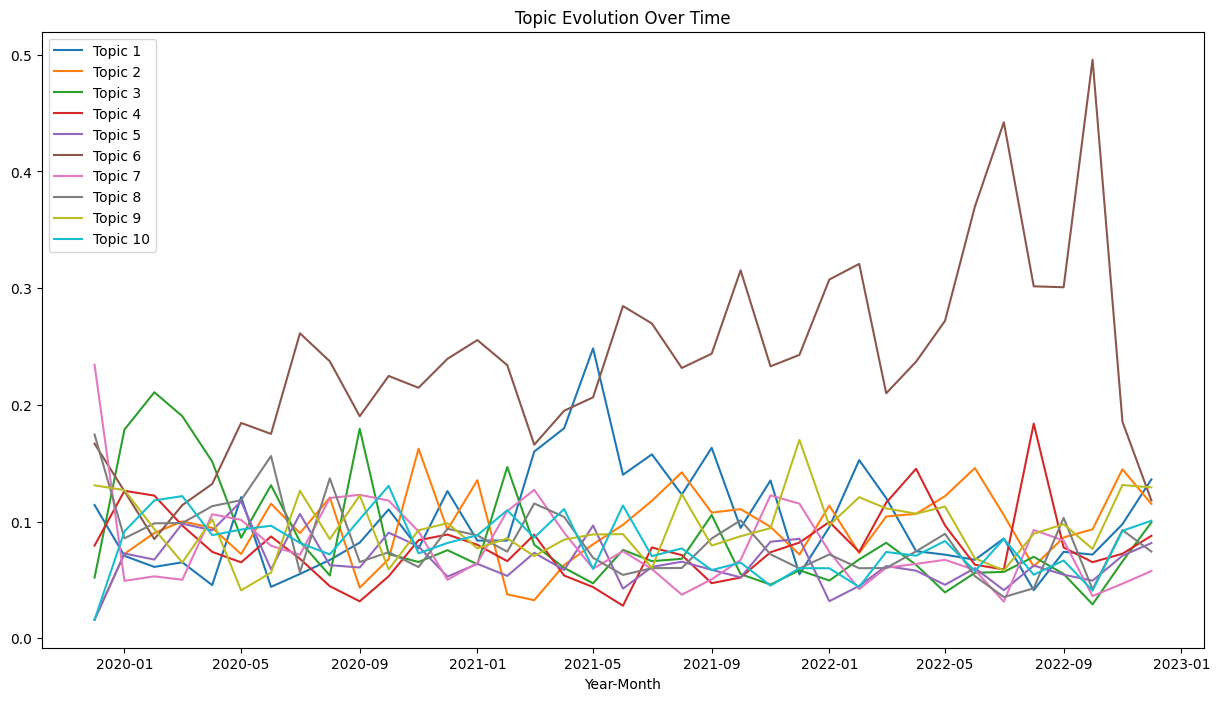

In [22]:
# topic trends in time
chn['Yearmonth'] = pd.to_datetime(chn['Yearmonth'], format='%Y-%m')

# Function to get topic distribution for each document
def get_topic_distribution(text):
    bow = chn_dict.doc2bow(text)
    topic_dist=chn_tm_lda.get_document_topics(bow, minimum_probability=0.0)
    topic_dist=[prob for _, prob in topic_dist]  # Extract probabilities
    return topic_dist

# Apply to all documents
chn['topic_distribution']=chn['title_tokens'].apply(get_topic_distribution)

# Expand topic distributions into separate columns
topic_columns = [f'Topic_{i}' for i in range(chn_tm_lda.num_topics)]
chn[topic_columns] = pd.DataFrame(chn['topic_distribution'].tolist(), index=chn.index)

# Group by 'Yearmonth' and calculate the mean topic distribution for each month
topic_evolution=chn.groupby('Yearmonth')[topic_columns].mean()

# Plot the topic trends over time
plt.figure(figsize=(15, 8))
for topic in topic_evolution.columns:
    # Extract the topic number from the column name
    topic_number=topic.split('_')[1]  # Extract the number part from 'Topic_0'
    plt.plot(topic_evolution.index, topic_evolution[topic], label=f'Topic {int(topic_number) + 1}')

plt.title('Topic Evolution Over Time')
plt.xlabel('Year-Month')
plt.legend(loc='upper left')
plt.show()

In [32]:
chn

,Title,Link,Date,Content,Yearmonth,Tokens,title_tokens,Topic,Topic_Prob,topic_distribution,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,covid treatment molnupiravir approved for impo...,//www.chinadaily.com.cn/a/202212/30/WS63aee077...,2022-12-30 20:58:00,China's top drug regulator said on Friday that...,2022-12-01,"[china, top, drug, regulator, say, friday, gra...","[covid, treatment, molnupiravir, approve, impo...",4,0.586001,"[0.014290624, 0.014289401, 0.0142893, 0.014288...",0.014291,0.014289,0.014289,0.014289,0.586003,0.014295,0.299677,0.014289,0.014289,0.014289
1,china allocates medical resources to ensure pe...,//www.chinadaily.com.cn/a/202212/30/WS63ae92c7...,2022-12-30 15:26:00,BEIJING -- China is actively allocating medica...,2022-12-01,"[beijing, china, actively, allocate, medical, ...","[china, allocate, medical, resource, ensure, p...",2,0.618605,"[0.011113636, 0.011113802, 0.61864203, 0.01111...",0.011114,0.011114,0.618642,0.011114,0.011113,0.011113,0.011116,0.011114,0.292442,0.011118
2,domestic covid-19 drug effective in trial,//www.chinadaily.com.cn/a/202212/30/WS63ae35c5...,2022-12-30 08:49:00,A domestic antiviral COVID-19 pill is as effec...,2022-12-01,"[domestic, antiviral, covid, pill, effective, ...","[domestic, covid, drug, effective, trial]",0,0.474135,"[0.47413135, 0.016668258, 0.016671157, 0.01666...",0.474131,0.016668,0.016671,0.016669,0.016668,0.016669,0.392520,0.016668,0.016668,0.016668
3,steps taken to ensure covid preparedness,//www.chinadaily.com.cn/a/202212/30/WS63ae1757...,2022-12-30 06:39:00,China's recent shifts in COVID-19 control stra...,2022-12-01,"[china, recent, shift, covid, control, strateg...","[step, take, ensure, covid, preparedness]",0,0.649031,"[0.6490403, 0.016698543, 0.016706156, 0.016698...",0.649040,0.016699,0.016706,0.016698,0.016698,0.217353,0.016700,0.016700,0.016707,0.016698
4,china ensures production of fever reducing med...,//www.chinadaily.com.cn/a/202212/29/WS63ad91ac...,2022-12-29 21:09:00,The daily production volume of fever reduction...,2022-12-01,"[daily, production, volume, fever, reduction, ...","[china, ensure, production, fever, reduce, med...",2,0.871414,"[0.014287645, 0.014287085, 0.8714137, 0.014287...",0.014288,0.014287,0.871414,0.014287,0.014287,0.014286,0.014289,0.014287,0.014287,0.014289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,wuhan wet market closes amid pneumonia outbreak,//www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...,2020-01-01 17:45:00,A Central China wet market known for seafood w...,2020-01-01,"[central, china, wet, market, know, seafood, c...","[wuhan, wet, market, close, amid, pneumonia, o...",9,0.749660,"[0.012502702, 0.012506283, 0.012507816, 0.0125...",0.012503,0.012506,0.012508,0.012502,0.012501,0.012501,0.012501,0.012504,0.150309,0.749665
3507,27 quarantined in wuhan due to viral pneumonia,//www.chinadaily.com.cn/a/202001/01/WS5e0bdf82...,2020-01-01 07:53:00,Twenty-seven people infected by viral pneumoni...,2020-01-01,"[twenty, seven, people, infect, viral, pneumon...","[quarantine, wuhan, due, viral, pneumonia]",2,0.671509,"[0.1951407, 0.016669655, 0.6715077, 0.01667097...",0.195141,0.016670,0.671508,0.016671,0.016668,0.016668,0.016670,0.016669,0.016668,0.016668
3508,viral pneumonia cases reported in central china,//www.chinadaily.com.cn/a/201912/31/WS5e0b1132...,2019-12-31 17:13:00,"WUHAN - The 27 pneumonia cases in Wuhan, capit...",2019-12-01,"[wuhan, pneumonia, case, wuhan, capital, centr...","[viral, pneumonia, case, report, central, china]",0,0.308715,"[0.30907208, 0.014289146, 0.12272961, 0.014287...",0.309072,0.014289,0.122730,0.014288,0.014287,0.300502,0.014290,0.014287,0.181967,0.014289
3509,china's 1st homegrown hpv vaccine approved,//www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...,2019-12-31 16:52:00,China's drug regulator has approved the countr...,2019-12-01,"[china, drug, regulator, approve, country, fir...","[china, homegrown, hpv, vaccin

In [18]:
chn['Topic'].value_counts()

Topic
5    826
0    359
1    356
8    349
2    325
3    316
9    295
7    280
6    215
4    190
Name: count, dtype: int64

In [19]:
chn.to_json('tokenized_chn.json', orient='records', lines=True)


In [99]:
word_freq=chn_dict.dfs
freq_chn=[(chn_dict[id], freq) for id, freq in word_freq.items()]
freq_chn=pd.DataFrame(freq_chn, columns=['Word', 'Frequency'])
freq_chn

,Word,Frequency
0,covid,1502
1,treatment,73
2,molnupiravir,1
3,approve,26
4,import,91
...,...,...
2432,valent,1
2433,gmo,1
2434,crop,1
2435,wet,1


In [104]:
freq_chn_sort=freq_chn.sort_values(by='Frequency',ascending=False)

In [108]:
freq_chn_20=freq_chn_sort.head(20)

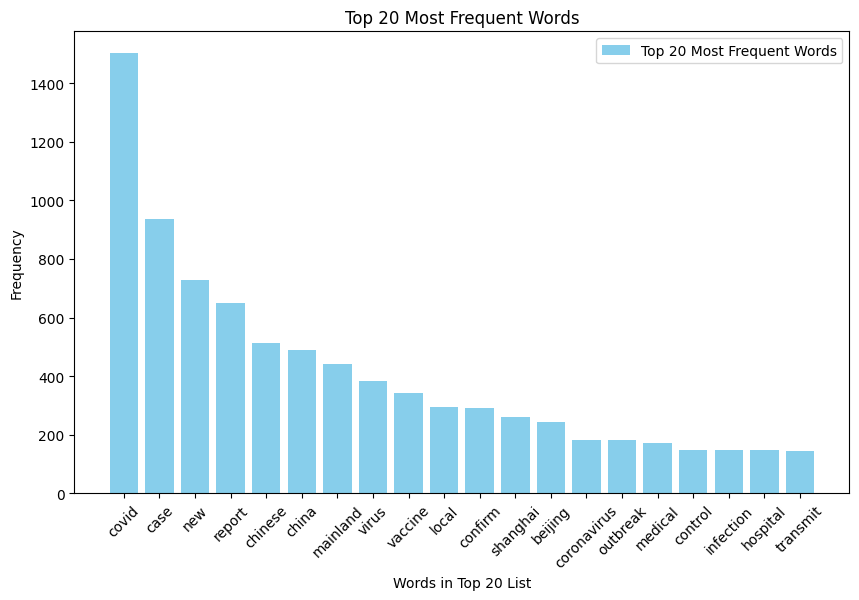

In [110]:
plt.figure(figsize=(10, 6))
plt.bar(freq_chn_20['Word'], freq_chn_20['Frequency'], color='skyblue')

# Adding labels and title
plt.xlabel("Words in Top 20 List")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words")
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(["Top 20 Most Frequent Words"], loc='best')

# Display the plot
plt.show()

In [112]:
import seaborn as sns

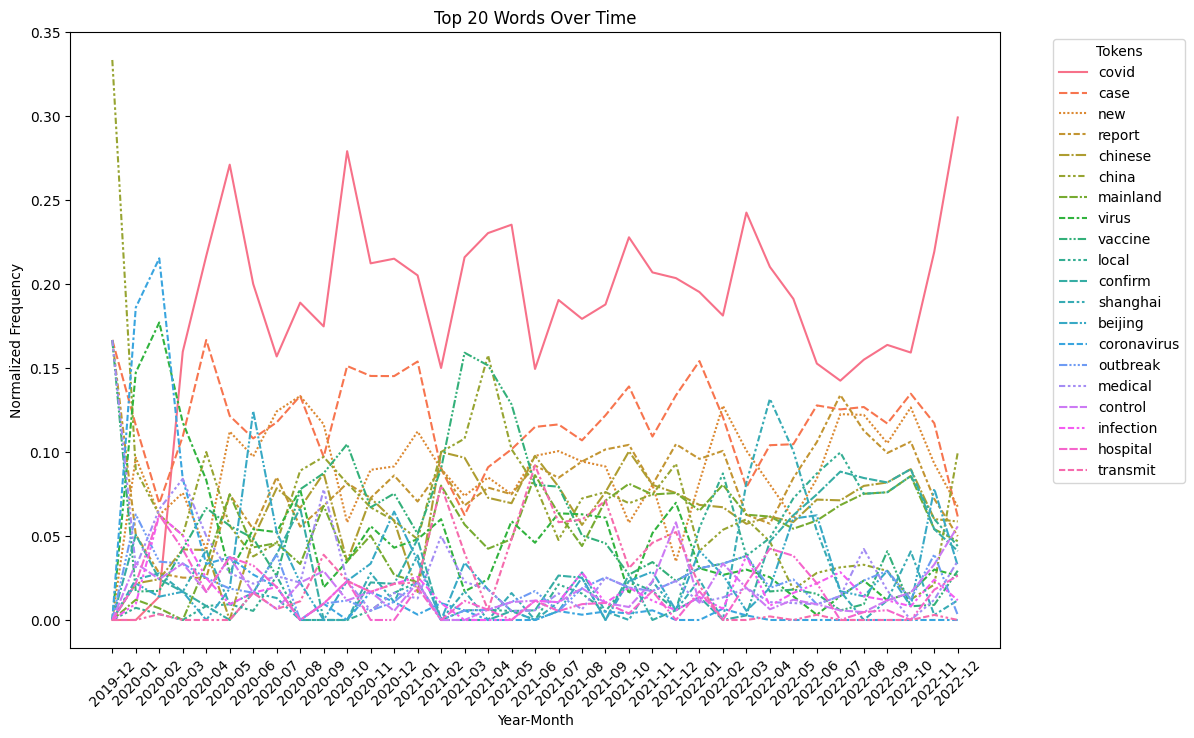

In [114]:
# Explode the tokens list so each token has its own row
chn_exploded=chn.explode('title_tokens')
token_counts=chn_exploded.groupby(['Yearmonth', 'title_tokens']).size().reset_index(name='count')
token_pivot=token_counts.pivot(index='Yearmonth', columns='title_tokens', values='count').fillna(0)
top_tokens=token_pivot.sum().sort_values(ascending=False).head(20).index
token_pivot_top=token_pivot[top_tokens]
token_pivot_top_normalized=token_pivot_top.div(token_pivot_top.sum(axis=1), axis=0)

# Plotting the top 20 tokens over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=token_pivot_top_normalized)
plt.title('Top 20 Words Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Normalized Frequency')
plt.legend(title='Tokens', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [50]:
from wordcloud import WordCloud

In [63]:
freq_chn_dict=pd.Series(freq_chn.Frequency.values, index=freq_chn.Word).to_dict()

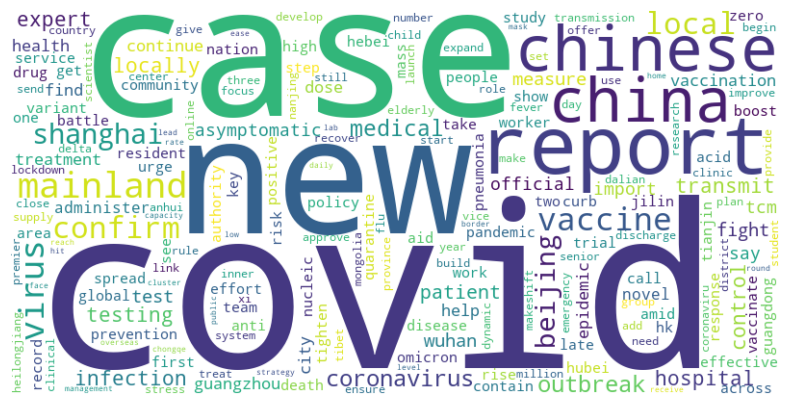

In [64]:
# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq_chn_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [115]:
freq_chn[freq_chn['Word']=='border']['Frequency']

749    18
Name: Frequency, dtype: int64

In [55]:
chn[chn['Topic'].isin([1,2,4])]

,Title,Link,Date,Content,Yearmonth,Tokens,title_tokens,Topic
0,covid treatment molnupiravir approved for impo...,//www.chinadaily.com.cn/a/202212/30/WS63aee077...,2022-12-30 20:58:00,China's top drug regulator said on Friday that...,2022-12,"[china, top, drug, regulator, say, friday, gra...","[covid, treatment, molnupiravir, approve, impo...",4
1,china allocates medical resources to ensure pe...,//www.chinadaily.com.cn/a/202212/30/WS63ae92c7...,2022-12-30 15:26:00,BEIJING -- China is actively allocating medica...,2022-12,"[beijing, china, actively, allocate, medical, ...","[china, allocate, medical, resource, ensure, p...",4
2,domestic covid-19 drug effective in trial,//www.chinadaily.com.cn/a/202212/30/WS63ae35c5...,2022-12-30 08:49:00,A domestic antiviral COVID-19 pill is as effec...,2022-12,"[domestic, antiviral, covid, pill, effective, ...","[domestic, covid, drug, effective, trial]",4
3,steps taken to ensure covid preparedness,//www.chinadaily.com.cn/a/202212/30/WS63ae1757...,2022-12-30 06:39:00,China's recent shifts in COVID-19 control stra...,2022-12,"[china, recent, shift, covid, control, strateg...","[step, take, ensure, covid, preparedness]",1
4,china ensures production of fever reducing med...,//www.chinadaily.com.cn/a/202212/29/WS63ad91ac...,2022-12-29 21:09:00,The daily production volume of fever reduction...,2022-12,"[daily, production, volume, fever, reduction, ...","[china, ensure, production, fever, reduce, med...",2
...,...,...,...,...,...,...,...,...
3503,china greenlights first self-developed 13-vale...,//www.chinadaily.com.cn/a/202001/02/WS5e0da957...,2020-01-02 16:27:00,BEIJING - The National Medical Products Admini...,2020-01,"[beijing, national, medical, product, administ...","[china, greenlight, first, self, develop, vale...",4
3504,chinese vaccine for hpv approved,//www.chinadaily.com.cn/a/202001/02/WS5e0d4067...,2020-01-02 08:59:00,China has approved its first domestically made...,2020-01,"[china, approve, first, domestically, make, va...","[chinese, vaccine, hpv, approve]",4
3506,wuhan wet market closes amid pneumonia outbreak,//www.chinadaily.com.cn/a/202001/01/WS5e0c6a49...,2020-01-01 17:45:00,A Central China wet market known for seafood w...,2020-01,"[central, china, wet, market, know, seafood, c...","[wuhan, wet, market, close, amid, pneumonia, o...",2
3509,china's 1st homegrown hpv vaccine approved,//www.chinadaily.com.cn/a/201912/31/WS5e0b0c55...,2019-12-31 16:52:00,China's drug regulator has approved the countr...,2019-12,"[china, drug, regulator, approve, country, fir...","[china, homegrown, hpv, vaccine, approve]",4
